In [48]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#criar um dataset aleatorio para teste
from sklearn.datasets import make_blobs

#importando K-Means
from sklearn.cluster import KMeans

#metricas e relatorios
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
dfCollege = pd.read_csv('E:\Estudos\DataScience-MachineLearning\kaggle - bases de dados\College_Data.csv', index_col=0)
dfCollege.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
dfCollege.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

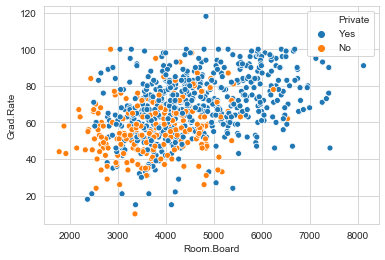

In [28]:
#ANALISE EXPLORATORIA DE DADOS

#criar um scartterplot que mostre a relação entre Grad.Rate x Room.Board onde os ponto seja coloridos pela coluna Private

sns.scatterplot(data= dfCollege, x = dfCollege['Room.Board'] , y= dfCollege['Grad.Rate'], hue= dfCollege['Private'])

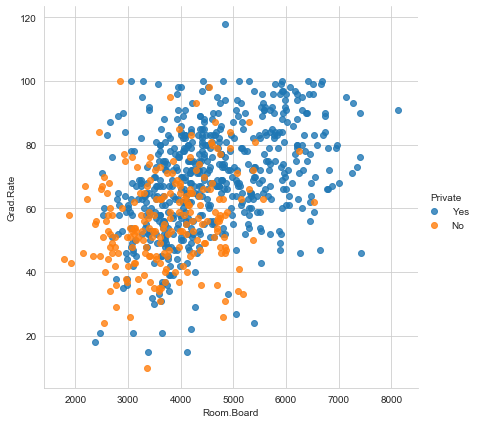

In [25]:
#Sob o olhar do lmplot

sns.lmplot(data = dfCollege, x = 'Room.Board', y = 'Grad.Rate', hue = 'Private', height = 6, fit_reg= False)
sns.set_style('whitegrid')

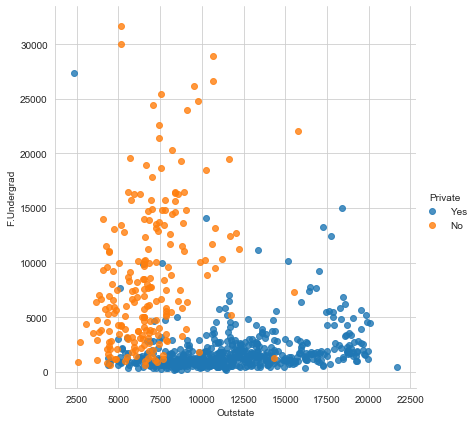

In [31]:
#criar um lmplot que mostre a relação entre F.Undergrad x Outstate onde os ponto seja coloridos pela coluna Private

sns.lmplot(data = dfCollege, x = 'Outstate', y = 'F.Undergrad', hue = 'Private', height = 6, fit_reg= False)
sns.set_style('whitegrid')

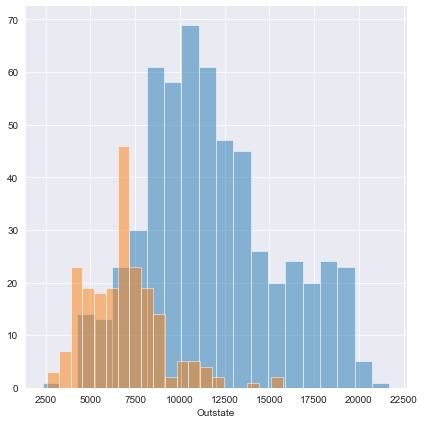

In [35]:
#Criar um grafico personalizado usando o faceGrid do tipo histograma que mostre os dados de Out of State Tution x Private

sns.set_style('darkgrid')
grafico = sns.FacetGrid(dfCollege, hue='Private', height = 6)
grafico = grafico.map(plt.hist, 'Outstate', alpha = 0.5, bins= 20)

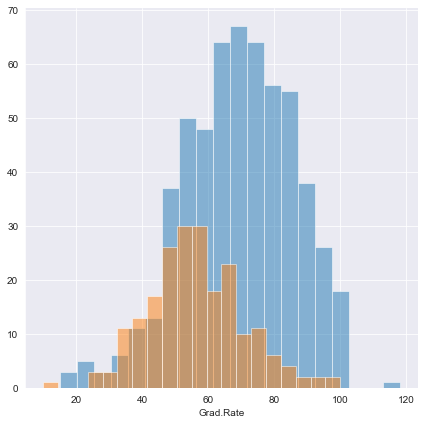

In [36]:
#Criar um grafico personalizado usando o faceGrid do tipo histograma que mostre os dados de Grad.Rate x Private

sns.set_style('darkgrid')
grafico = sns.FacetGrid(dfCollege, hue='Private', height = 6)
grafico = grafico.map(plt.hist, 'Grad.Rate', alpha = 0.5, bins= 20)

In [37]:
#Pelo grafico, conseguimos observar que existe uma institução com acima de 100% de aprovação. Qual seria esse colegio?
#provavel seria um erro, que deveria ser ajustado.

dfCollege[dfCollege['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [40]:
#ajustando o erro

dfCollege['Grad.Rate']['Cazenovia College'] = 100

#coferindo o resultado
dfCollege[dfCollege['Grad.Rate'] > 100]

C:\Users\WOSH\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


In [42]:
#CRINDO O MODELO KMEANS

kmeans = KMeans(n_clusters= 2)

#excluindo a coluna Private pois é essa coluna que devemos treinar o modelo para acertar 
kmeans.fit(dfCollege.drop('Private', inplace = False, axis= 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
#informe os modelos centrais dos clusters

kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [44]:
#CRIE UMA FUNÇÃO CHAMADA CLUSTER QUE CONVERTA A COLUNA PRIVATE EM 1 PARA SIM E 0 PARA NÃO

def converter (cluster):
    if cluster == 'Yes':
        return 1
    else:
        return 0



In [46]:
#aplicando a função

dfCollege['Cluster'] = dfCollege['Private'].apply(converter)
dfCollege.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [49]:
#Avaliando o modelo - metricas e relatorios



print('##########   Classification Report   #############\n',classification_report(dfCollege['Cluster'], kmeans.labels_))
print('##########   Metriz de Confusão  #############\n',confusion_matrix(dfCollege['Cluster'], kmeans.labels_))

##########   Classification Report   #############
               precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

##########   Metriz de Confusão  #############
 [[138  74]
 [531  34]]
